In [1]:
# Import our dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
from wordcloud import WordCloud,STOPWORDS


#Import and read the WELFake_Dataset.csv.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
news_df = pd.read_csv("WELFake_Dataset.csv")
news_df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [2]:
# finding Datatypes

news_df.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

In [3]:
# Statistic for text column

text_length = news_df.text.str.split().str.len()
text_length.describe()

count    72095.000000
mean       540.843346
std        625.442464
min          0.000000
25%        227.000000
50%        399.000000
75%        667.000000
max      24234.000000
Name: text, dtype: float64

In [4]:
# Statistic for title columns

title_length = news_df.title.str.split().str.len()
title_length.describe()

count    71576.000000
mean        12.268218
std          4.133661
min          1.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         72.000000
Name: title, dtype: float64

In [5]:
# Drop Unnecessary Columns

news_df=news_df.drop("Unnamed: 0", axis=1)
news_df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
# Count label values

news_df['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

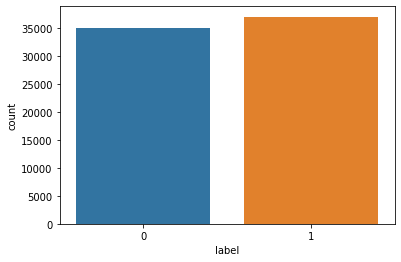

In [7]:
# Counting plot for labels

sns.countplot(x="label", data=news_df)

In [8]:
#news_df[['title', 'text']].isnull()="None"

news_df["title"].fillna("None", inplace = True)
news_df["text"].fillna("None", inplace = True)

In [9]:
# Checking null values again after replace them with None

news_df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [10]:
news_df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,None,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [11]:
# Saving Data frame as csv

news_df.to_csv("fakenews_data.csv", index=False)

In [12]:
df=pd.read_csv("fakenews_data.csv")
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,None,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [13]:
# import libraries for visualization 

import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to /Users/ssayhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ssayhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Using reg to remove some punctation

df['title'] = df['title'].str.replace(r'[^\w\s]', '')  # remove everything but characters and punctuation
df['title'] = df['title'].str.replace('[^a-zA-Z]', ' ')
df['text'] = df['text'].str.replace(r'[^\w\s]', '')  # remove everything but characters and punctuation
df['text'] = df['text'].str.replace('[^a-zA-Z]', ' ')

/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_90964/3222575801.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r'[^\w\s]', '')  # remove everything but characters and punctuation
/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_90964/3222575801.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('[^a-zA-Z]', ' ')
/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_90964/3222575801.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]', '')  # remove everything but characters and punctuation
/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_90964/3222575801.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'

In [15]:
# Changing all words as lower before apply stopwords

df['title']=df['title'].str.lower()
df['text']=df['text'].str.lower()

In [16]:
df.head()

,title,text,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
1,none,did they post their votes for hillary already,1
2,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last n...,1
3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,0
4,satan russia unvelis an image of its terrify...,the rs sarmat missile dubbed satan will re...,1


In [65]:
# Applying stopwords

set_words= stopwords.words('english')
random_words=['would', 'said', 'mr', 'new','says', 'us', 'one', 'like', 'could', 'also', 'state', 'states', 'time', 'house', 'even', 'united', 'two', 'donald', 'many', 'first', 'years', 'last', 'news', 'white', 'told']
new_stopwords_list = set_words+random_words

In [66]:
# Removing stopwords from our data frame

df['title']=df['title'].apply(lambda x:' '.join([word for word in x.split() if word not in (new_stopwords_list)]))
df['text']=df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (new_stopwords_list)]))

In [67]:
df.head()

,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf fuky...,1
1,none,post votes hillary already,1
2,unbelievable obamas attorney general charlotte...,demonstrators gathered night exercising consti...,1
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,satan russia unvelis image terrifying supernuk...,rs sarmat missile dubbed satan replace ss flie...,1


In [68]:
# Counting firs 10 most common words in title

df["title"].str.split(expand=True).stack().value_counts()[:10]

trump        15929
video         8970
york          6601
times         6578
hillary       3467
clinton       3257
obama         3124
trumps        2901
watch         2186
president     2002
dtype: int64

In [69]:
# Counting 10 most common words in text columns
word_count = df["text"].str.split(expand=True).stack().value_counts()[:10]

In [71]:
word_count

trump         180595
people         88150
president      82887
clinton        63286
government     47104
obama          43967
campaign       41148
republican     37800
election       37157
hillary        36724
dtype: int64

In [72]:
# Converting to dataframe
word_count=pd.DataFrame(word_count)
word_count=word_count.reset_index()

In [73]:
word_count.rename(columns={'index':'Words', 0:'Count'}, inplace=True)

In [74]:
word_count.head()

,Words,Count
0,trump,180595
1,people,88150
2,president,82887
3,clinton,63286
4,government,47104


In [75]:
words = word_count['Words']
words

0         trump
1        people
2     president
3       clinton
4    government
5         obama
6      campaign
7    republican
8      election
9       hillary
Name: Words, dtype: object

In [76]:
# Applying loop to count true or false in most common words in text
df2 = pd.DataFrame(columns = [
    'word',
    'total',
    '1_count',
    '0_count',
])
for word in words:
    word_df = news_df[news_df['text'].str.contains(word, regex=True, case = False).fillna(False)]
    count = word_df['label'].value_counts(sort = False)
    total = len(word_df)
    df2 = df2.append({'word': word, '1_count':count[0], "0_count": total-count[0],"total":total}, ignore_index=True)
df2

/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_90964/3022582554.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'word': word, '1_count':count[0], "0_count": total-count[0],"total":total}, ignore_index=True)
/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_90964/3022582554.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'word': word, '1_count':count[0], "0_count": total-count[0],"total":total}, ignore_index=True)
/var/folders/ml/2hfgt6ss5515_z_t800zfv4c0000gn/T/ipykernel_90964/3022582554.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'word': word, '1_count':count[0], "0_count": total-count[0],"total":total}, ignore_index=True)
/var/fo

,word,total,1_count,0_count
0,trump,32668,15615,17053
1,people,34088,16291,17797
2,president,39887,22555,17332
3,clinton,14936,5223,9713
4,government,21498,13248,8250
5,obama,17310,8232,9078
6,campaign,18627,9785,8842
7,republican,19817,10978,8839
8,election,18758,9894,8864
9,hillary,14443,4714,9729


In [85]:
df2.to_csv("counting.csv")

In [84]:
dff=pd.read_csv('counting.csv')
dff.head()

,Unnamed: 0,word,total,1_count,0_count
0,0,trump,32668,15615,17053
1,1,people,34088,16291,17797
2,2,president,39887,22555,17332
3,3,clinton,14936,5223,9713
4,4,government,21498,13248,8250


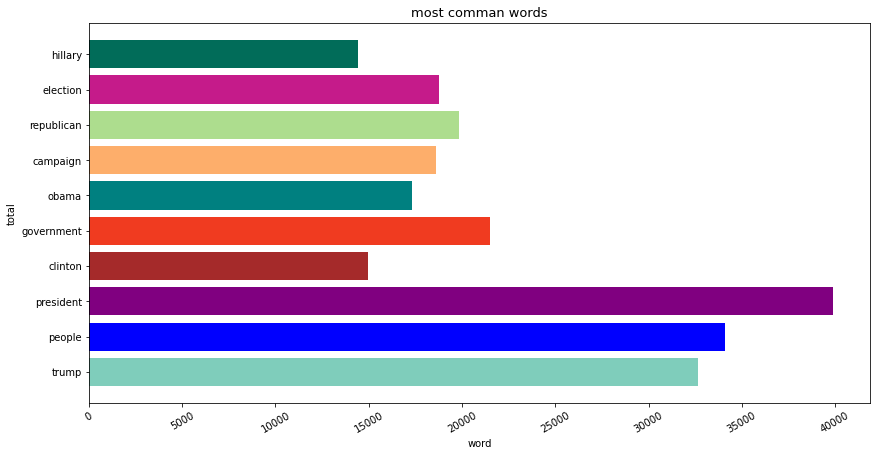

In [78]:
# Creating matplot for most common for words

plt.figure(figsize=(14,7))
New_Colors = ['#7fcdbb','blue','purple','brown','#f03b20', 'teal', '#fdae6b', '#addd8e', '#c51b8a', '#016c59']
plt.barh(df2['word'], df2['total'], color=New_Colors)
plt.title('most comman words', fontsize=13)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel('word')
plt.ylabel('total')

plt.show()

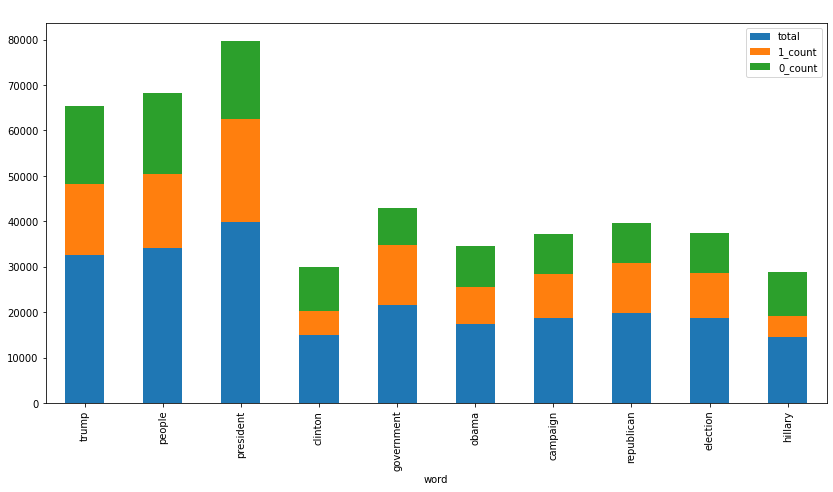

In [79]:
# Creating the stacked plot

df2.plot(x='word', kind='bar', stacked=True, title= "  ", figsize=(14,7))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

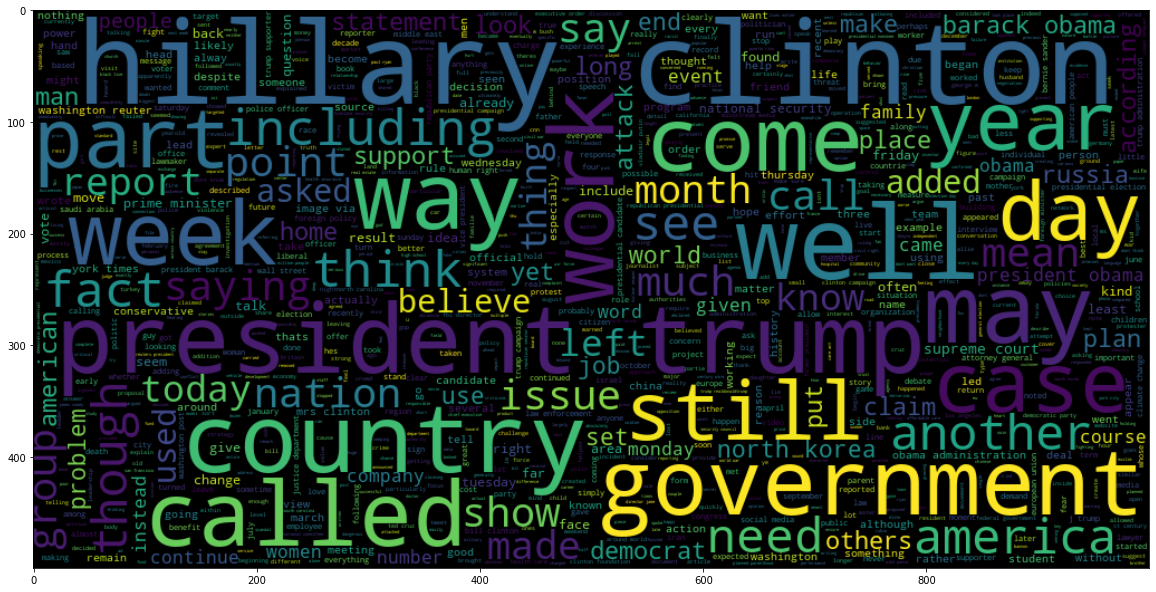

In [80]:
# Creating WordCloud for most common words in text

wc=WordCloud(max_words=1000, background_color='black', width=1000, height =500)
word_cloud=wc.generate(' '.join(df['text']))
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation = 'bilinear')
plt.show

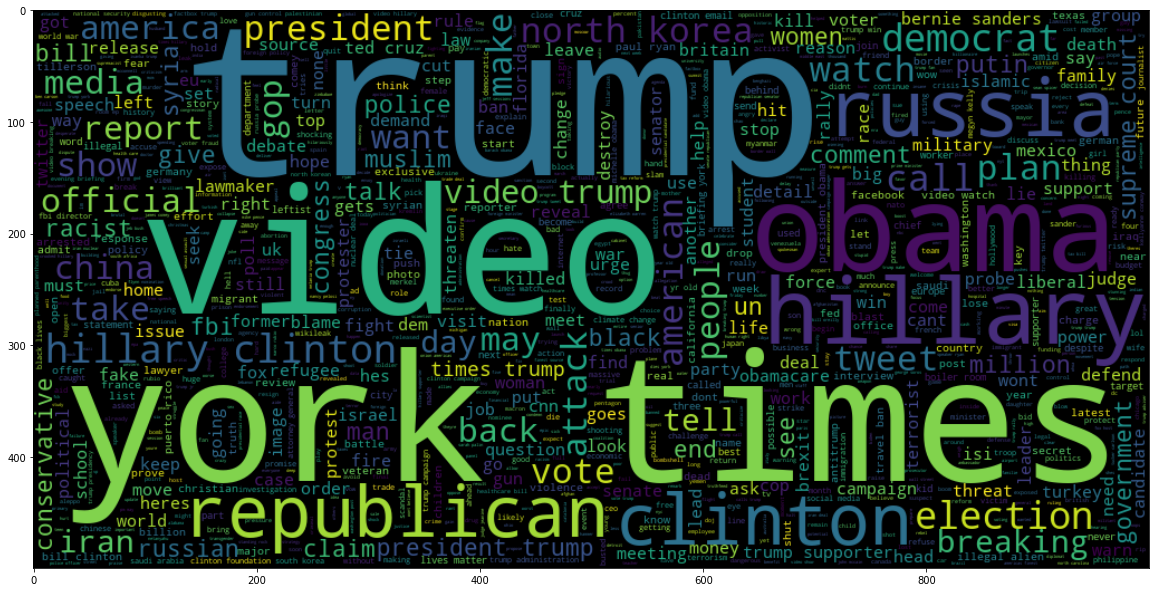

In [81]:
# Creating WordCloud for most common words in title

word_cloud_title=wc.generate(" ".join(df['title']))
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [33]:
#Saving our cleaned data

df.to_csv("clean_fakenews.csv", index=False)

In [54]:
df_clean=pd.read_csv("clean_fakenews.csv")
df_clean.head()

,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members fyf fuky...,1
1,none,post votes hillary already,1
2,unbelievable obamas attorney general says char...,demonstrators gathered last night exercising c...,1
3,bobby jindal raised hindu uses story christian...,dozen politically active pastors came private ...,0
4,satan russia unvelis image terrifying new supe...,rs sarmat missile dubbed satan replace ss flie...,1


In [82]:
# Training our data

train_text, temp_text, train_labels, temp_labels = train_test_split(df['title'], df['label'], 
                                                                    random_state=1, 
                                                                    test_size=0.3)

Text(0, 0.5, 'Number of texts')

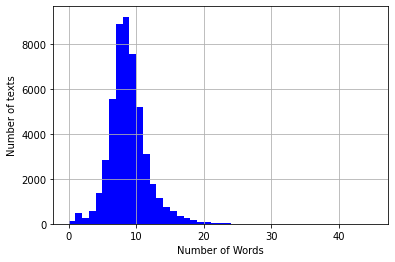

In [83]:
# Getting bar of words in text

text_length = [len(i.split()) for i in train_text]
pd.Series(text_length).hist(bins = 45, color='blue')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')